<a href="https://colab.research.google.com/github/juanosalvador/Market-Basket-Analysis-in-Python/blob/principal/online_retail_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[medium](https://medium.com/swlh/a-tutorial-about-market-basket-analysis-in-python-predictive-hacks-497dc6e06b27)<br>
[microsoft](https://docs.microsoft.com/es-es/archive/msdn-magazine/2018/december/artificially-intelligent-market-basket-analysis)




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/014_Analisis_de_asociacion/Online Retail.xlsx'
df = pd.read_excel(path)

In [ ]:
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.shape

(406829, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df = df.sort_values(by = 'InvoiceDate', ascending= True)

In [ ]:
#df_picru["hour"] = df_picru["DATE_H_REAL"].dt.strftime("%H:%M:%S")
df['hour'] = df['InvoiceDate'].dt.strftime("%H")
df['day'] = df['InvoiceDate'].dt.strftime("%Y-%m-%d")

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,12,2011-12-09
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,12,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011-12-09
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,12,2011-12-09


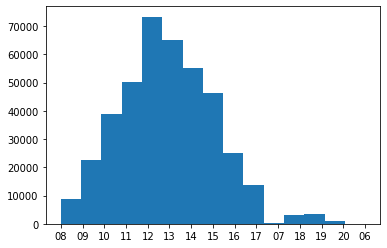

In [ ]:
plt.hist(df['hour'], bins=15)
plt.show()

In [ ]:
numero_items = df.groupby(['Quantity']).size().reset_index(name = 'numero_items')
numero_items

,Quantity,numero_items
0,-80995,1
1,-74215,1
2,-9360,1
3,-3114,1
4,-2000,1
...,...,...
431,4300,1
432,4800,1
433,12540,1
434,74215,1


In [ ]:
df['Quantity'].value_counts()

 1      73314
 12     60033
 2      58003
 6      37688
 4      32183
        ...  
-51         1
 95         1
-162        1
 94         1
 342        1
Name: Quantity, Length: 436, dtype: int64

In [ ]:
df.groupby(['Description']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False)

,Description,counts
3716,WHITE HANGING HEART T-LIGHT HOLDER,2070
2780,REGENCY CAKESTAND 3 TIER,1905
1771,JUMBO BAG RED RETROSPOT,1662
217,ASSORTED COLOUR BIRD ORNAMENT,1418
2355,PARTY BUNTING,1416
...,...,...
453,BLUE NEW BAROQUE FLOCK CANDLESTICK,1
1720,IVORY SHELL HEART EARRINGS,1
457,BLUE PAINTED KASHMIRI CHAIR,1
1712,IVORY PANTRY HANGING LAMP,1


# Asociation Rules for online retailer

In [ ]:
transaccion = df['InvoiceNo'].unique()

In [ ]:
len(transaccion)

22190

In [ ]:
trans_536365 = df[df['InvoiceNo'] == 536365]
trans_536365

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,08,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,08,2010-12-01


In [ ]:
trans_536365['Description']

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
5           SET 7 BABUSHKA NESTING BOXES
6      GLASS STAR FROSTED T-LIGHT HOLDER
Name: Description, dtype: object

In [ ]:
customer_17850 = df[df['CustomerID'] == 17850.0]

In [ ]:
customer_17850

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
86891,C543611,21871,SAVE THE PLANET MUG,-1,2011-02-10 14:38:00,1.06,17850.0,United Kingdom,14,2011-02-10
86890,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850.0,United Kingdom,14,2011-02-10
86889,C543611,22632,HAND WARMER RED RETROSPOT,-6,2011-02-10 14:38:00,1.85,17850.0,United Kingdom,14,2011-02-10
86888,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850.0,United Kingdom,14,2011-02-10


In [ ]:
df[df['Description'] == 'Manual']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,day
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,15,2010-12-01
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,15,2010-12-01
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,14,2010-12-03
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,11,2010-12-05
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom,12,2010-12-05
...,...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,14,2011-12-06
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,09,2011-12-07
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom,13,2011-12-07
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom,13,2011-12-08


In [ ]:
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,12,2011-12-09
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,12,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011-12-09
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,12,2011-12-09


In [ ]:
spain = df[df['Country'] == 'Spain']

In [ ]:
spain

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,day
6425,536944,20728,LUNCH BAG CARS BLUE,100,2010-12-03 12:20:00,1.45,12557.0,Spain,12,2010-12-03
6423,536944,20727,LUNCH BAG BLACK SKULL.,60,2010-12-03 12:20:00,1.65,12557.0,Spain,12,2010-12-03
6424,536944,20725,LUNCH BAG RED RETROSPOT,70,2010-12-03 12:20:00,1.65,12557.0,Spain,12,2010-12-03
6421,536944,22383,LUNCH BAG SUKI DESIGN,70,2010-12-03 12:20:00,1.65,12557.0,Spain,12,2010-12-03
6422,536944,22384,LUNCH BAG PINK POLKADOT,100,2010-12-03 12:20:00,1.45,12557.0,Spain,12,2010-12-03
...,...,...,...,...,...,...,...,...,...,...
535228,581193,23321,SMALL WHITE HEART OF WICKER,1,2011-12-07 17:05:00,1.65,17097.0,Spain,17,2011-12-07
535225,581193,85034B,3 WHITE CHOC MORRIS BOXED CANDLES,4,2011-12-07 17:05:00,1.25,17097.0,Spain,17,2011-12-07
535224,581193,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-07 17:05:00,2.10,17097.0,Spain,17,2011-12-07
535223,581193,21135,VICTORIAN METAL POSTCARD SPRING,4,2011-12-07 17:05:00,1.69,17097.0,Spain,17,2011-12-07


In [ ]:
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,12,2011-12-09
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,12,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011-12-09
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,12,2011-12-09


# Creando tabla

In [ ]:
tabla = spain.pivot_table(index='InvoiceNo', columns = 'Description', aggfunc=len, fill_value=0)
tabla = tabla>0

In [ ]:
tabla2 = spain.pivot_table(index='InvoiceNo', columns='Description', aggfunc='count',fill_value=0)

In [ ]:
tabla2

Country  ...                            hour
Description  50'S CHRISTMAS GIFT BAG LARGE  ... ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo                                   ...                                
536944                                   0  ...                               0
538095                                   0  ...                               0
538525                                   0  ...                               0
539351                                   0  ...                               0
540469                                   0  ...                               0
...                                    ...  ...                             ...
C569422                                  0  ...                               0
C571499                                  0  ...                               0
C574894                                  0  ...                               0
C575531                                  0  ...                               0
C581148                                  0  ...                               0

[105 rows x 8856 columns]

In [ ]:
tabla

Country  ...                            hour
Description  50'S CHRISTMAS GIFT BAG LARGE  ... ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo                                   ...                                
536944                                   0  ...                               0
538095                                   0  ...                               0
538525                                   0  ...                               0
539351                                   0  ...                               0
540469                                   0  ...                               0
...                                    ...  ...                             ...
C569422                                  0  ...                               0
C571499                                  0  ...                               0
C574894                                  0  ...                               0
C575531                                  0  ...                               0
C581148                                  0  ...                               0

[105 rows x 8856 columns]

In [ ]:
tabla == tabla2

Country  ...                            hour
Description  50'S CHRISTMAS GIFT BAG LARGE  ... ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo                                   ...                                
536944                                True  ...                            True
538095                                True  ...                            True
538525                                True  ...                            True
539351                                True  ...                            True
540469                                True  ...                            True
...                                    ...  ...                             ...
C569422                               True  ...                            True
C571499                               True  ...                            True
C574894                               True  ...                            True
C575531                               True  ...                            True
C581148                               True  ...                            True

[105 rows x 8856 columns]

In [ ]:
import pandas as pd
df = pd.DataFrame({'Account_number':[1,1,2,2,2,3,3],
                   'Product':['A', 'A', 'A', 'B', 'B','A', 'B']
                  })

In [ ]:
df

,Account_number,Product
0,1,A
1,1,A
2,2,A
3,2,B
4,2,B
5,3,A
6,3,B


In [ ]:
df.pivot_table(index = 'Account_number', columns= 'Product', aggfunc='count')

Account_number
1
2
3


In [ ]:
df.pivot_table(index = 'Account_number', columns= 'Product', aggfunc='count', fill_value=0)

Account_number
1
2
3


In [ ]:
df.pivot_table(index = 'Account_number', columns= 'Product', aggfunc=len, fill_value=0)

Product,A,B
Account_number,,
1,2,0
2,1,2
3,1,1


In [ ]:
df = pd.DataFrame({'Account_number':[1, 1, 2 ,2 ,2 ,3 ,3], 
                   'Product':['A', 'A', 'A', 'B', 'B','A', 'B'], 
                   'Price': [10] * 7,
                   'Quantity': [100] * 7})

In [ ]:
df

,Account_number,Product,Price,Quantity
0,1,A,10,100
1,1,A,10,100
2,2,A,10,100
3,2,B,10,100
4,2,B,10,100
5,3,A,10,100
6,3,B,10,100


In [ ]:
df.pivot_table(index='Account_number',
               columns='Product',
               aggfunc=len,
               fill_value=0)

Price    Quantity   
Product            A  B        A  B
Account_number                     
1                  2  0        2  0
2                  1  2        1  2
3                  1  1        1  1

In [ ]:
df.pivot_table(index='Account_number',
               columns='Product',
               aggfunc='size',
               fill_value=0)

Product,A,B
Account_number,,
1,2,0
2,1,2
3,1,1
